In [13]:
import pandas as pd
import scipy as sc
#from scipy.stats import pearsonr,spearmanr

import seaborn as sns

In [18]:
df = pd.read_csv('skyeng corr sample.csv')

In [48]:
df1 = df[(df['classes_bought'].notnull()) & (df['max_teaching_level_id'].notnull()) & (df['avg_price'].notnull()) & (df['max_teaching_level_id']!=2.0)]

In [49]:
print(len(df1[df1['avg_price']==0]))
print(len(df1[df1['avg_price']!=0]))


3
11939


In [50]:
df1['classes_bought'].unique()

array([64, 16,  4,  8, 32,  2, 10,  5,  1, 15, 12,  7, 18,  9,  6, 36, 20],
      dtype=int64)

<AxesSubplot:xlabel='max_teaching_level_id', ylabel='count'>

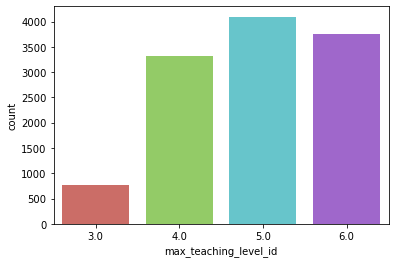

In [51]:
sns.countplot(x = 'max_teaching_level_id',data=df1, palette='hls')#x = 0, 
#plt.show()

<AxesSubplot:xlabel='classes_bought', ylabel='count'>

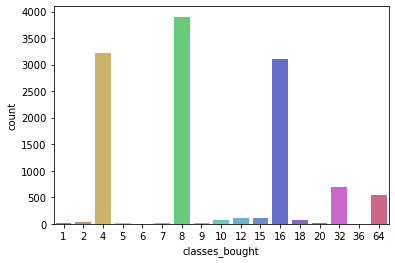

In [52]:
sns.countplot(x = 'classes_bought',data=df1, palette='hls')#x = 0, 


In [53]:
df1['avg_price_bin'] = pd.qcut(df1['avg_price'],[0, .25, .5, .75, 1.])

<ipython-input-53-94c52f44c5f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['avg_price_bin'] = pd.qcut(df1['avg_price'],[0, .25, .5, .75, 1.])


<AxesSubplot:xlabel='avg_price_bin', ylabel='count'>

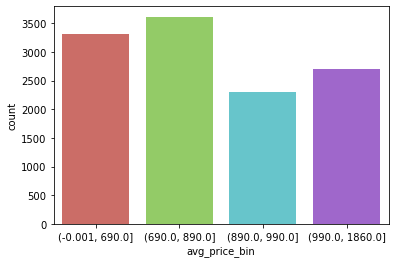

In [54]:
sns.countplot(x = 'avg_price_bin',data=df1, palette='hls')#x = 0, 


In [58]:
df1.groupby('max_teaching_level_id').agg({'classes_bought':'mean','avg_price_bin':'count'}).reset_index()

,max_teaching_level_id,classes_bought,avg_price_bin
0,3.0,14.985788,774
1,4.0,13.202166,3324
2,5.0,13.265934,4095
3,6.0,12.641771,3749


In [59]:
df_b8 = df1[df1['classes_bought']==8]

In [62]:
df_b8

,max_teaching_level_id,avg_price,classes_bought,avg_price_bin
22,5.0,990.0,8,"(890.0, 990.0]"
29,6.0,1720.0,8,"(990.0, 1860.0]"
36,5.0,990.0,8,"(890.0, 990.0]"
42,6.0,1720.0,8,"(990.0, 1860.0]"
47,5.0,990.0,8,"(890.0, 990.0]"
...,...,...,...,...
12035,5.0,690.0,8,"(-0.001, 690.0]"
12037,5.0,990.0,8,"(890.0, 990.0]"
12038,4.0,690.0,8,"(-0.001, 690.0]"
12040,4.0,690.0,8,"(-0.001, 690.0]"


In [60]:
pearsonr(df_b8['max_teaching_level_id'],df_b8['avg_price'])

(0.13468945347491906, 2.929529794001274e-17)

In [61]:
spearmanr(df_b8['max_teaching_level_id'],df_b8['avg_price'])

SpearmanrResult(correlation=-0.01792537243780291, pvalue=0.26294508508885917)